In [0]:
# Test 
print("Test")


In [3]:
from google.colab import drive
#drive.mount('/gdrive')
drive.mount('/gdrive', force_remount=True)
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
import sys
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython']


In [5]:
sys.path.append('/gdrive/My Drive/Colab Notebooks/rl_parkingplacefinder')
print(sys.path)

['', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/gdrive/My Drive/Colab Notebooks/rl_parkingplacefinder']


In [0]:
import simple_q_learning
from simple_q_learning import *

import Parking_lot
from Parking_lot import *
from Park_Finder_Agent import Park_Finder_Agent
from Park_Finder_Agent import Reward_Parameters



/gdrive/My Drive/Colab Notebooks/rl_parkingplacefinder/Parking_lot.py:208: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()

  0%|          | 44/55000 [00:00<02:06, 435.39it/s]


Start learning: 07-12-19 23 22 11



 51%|█████     | 27913/55000 [00:38<00:17, 1551.11it/s]

Early stopping because of no changes
End learning: 07-12-19 23 22 50


<Figure size 432x288 with 0 Axes>

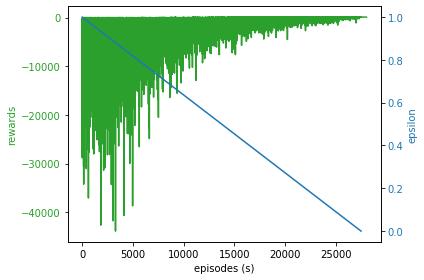

In [9]:
ffp = Parking_lot.Filling_Function_Parameters(uniform_distribution_p_value = 0.5)
ldp = Parking_lot.Lane_Direction_Parameters()

parking_environment = Parking_Lot(lane_direction_paramenters=ldp,
                            filling_function_parameters=ffp,
                            nr_parking_slots_per_lane=5,
                            nr_parking_lanes=4,
                            parking_lane_depth=2,
                            debug=True,
                            draw_graph = False,
                            show_summary = False
                            )

parking_lot = parking_environment.get_env()
reward_parameters = Reward_Parameters()
lmp = Learning_Model_Parameters()

file_name_parking_lot_plot = 'qtables/parking_lot_'+ ffp.getName() +'_' + str(lmp.EPISODES) +'_' + str(datetime.today().strftime("%y-%m-%d %H %M %S")) +'.png'
parking_environment.plot(save_file=True, file_name_parking_lot_plot=file_name_parking_lot_plot)

agent = Park_Finder_Agent(reward_parameters=reward_parameters, parking_environment=parking_environment)

Q = {}
for state in agent.stateSpacePlus:
  for action in agent.possibleActions:
    Q[state, action] = 0
    
doLearning(agent=agent, parking_environment=parking_environment, Q=Q, lmp=lmp)